# <h1><center> 📝Sales Analysis📝 </center></h1>                                                -- By Shivam Pal                       

#### Import the library

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge  the 12 month  sales data files into single csv file

In [2]:
All_data = pd.DataFrame(columns=['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'])

files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv("./Sales_Data/" + file , header=0)
    All_data = pd.concat([All_data , df])

All_data.to_csv("Merge_Sales_Data.csv" , index=False)


#### Read the updated dataframe

In [3]:
sales_data = pd.read_csv("Merge_Sales_Data.csv")

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Cleaning

1.sales_data[sales_data.isna().any(axis=1)] use to find the any row contain empty value and dropna use to drop the row

2.In between data there are some row like these ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date','Purchase Address']

3.find out the index_list contain such rows

In [4]:
sales_data.dropna(how="any" ,inplace=True)

sales_data[sales_data['Order ID'] == 'Order ID']

index_list = sales_data[sales_data['Order ID'] == 'Order ID'].index


4.drop rows using index_list

5.Now see no such rows 

In [5]:
sales_data.drop(index_list , axis=0 , inplace=True)

sales_data[sales_data['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [6]:
# Convert 'order date' into the datetime object
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'] , format='%m/%d/%y %H:%M')

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Add Month Column

In [7]:
sales_data['Month'] = sales_data['Order Date'].dt.strftime('%m')

In [8]:
sales_data['Month'] = sales_data['Month'].astype('int32')

#### Add Sales Column 

In [9]:
# convert str to numeric datatype
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'])

sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'])

sales_data['Sales'] = sales_data['Quantity Ordered']*sales_data['Price Each']

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


### Question 1: what was the best month for sales? How much was earned that month?

Answer : Month-12  and Total_month_sales = 4613443.34

In [11]:
result = sales_data.groupby('Month').sum()

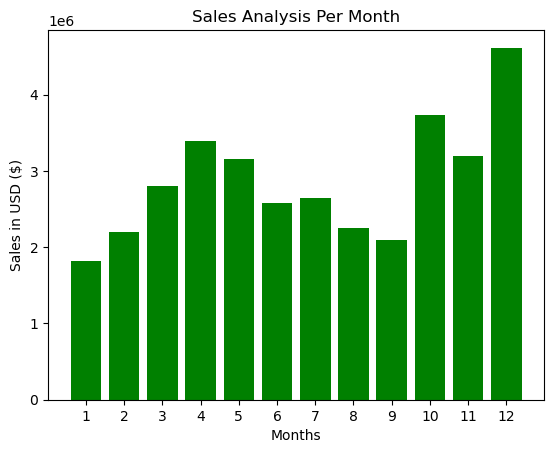

In [12]:
months = range(1 , 13)

plt.title('Sales Analysis Per Month')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.xticks(months)
plt.bar(months , result['Sales'] , color='green')
plt.show()

### Question 2 : What city had the highest number of sales?

Answer : San Francisco (CA)

In [13]:
sales_data['City'] = [ f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})" for x in sales_data['Purchase Address'].values]

In [14]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [16]:
 result1 = sales_data.groupby('City').sum()

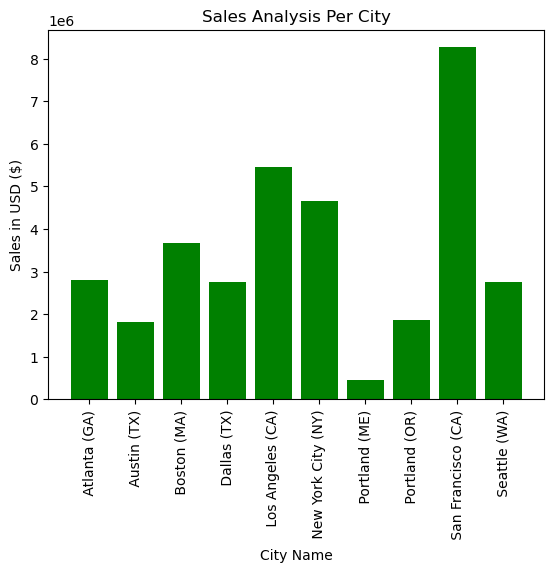

In [17]:
cities = result1.index.values

plt.bar(cities , result1['Sales']  ,color='Green' , width=0.8)
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.xticks(cities , rotation='vertical')
plt.title("Sales Analysis Per City")
plt.show()

### Question 3: What time should we display advertisements to maximize the likelihood of purchases? 

Answer : In morning 11AM to 12PM and In Afternoon 7PM

In [18]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour

sales_data['Minute'] = sales_data['Order Date'].dt.minute

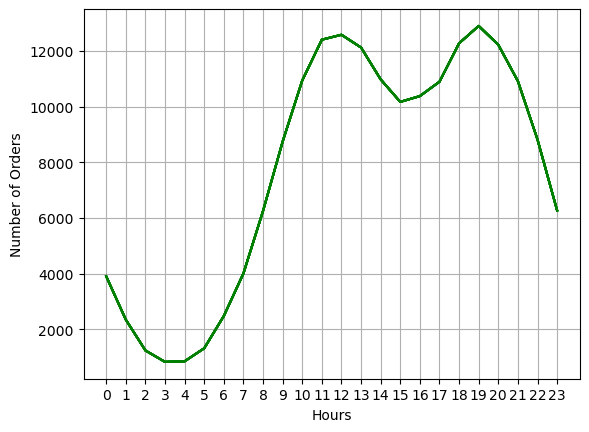

In [19]:
result2 = sales_data.groupby('Hour').count()

hours = result2.index.values
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.plot(hours , sales_data.groupby('Hour').count() , color='green')
plt.xticks(hours)
plt.grid()
plt.show()

### Question 4: What are the most frequently sold products? Why do you think it did? 


Answer : AAA Batteries (4-pack)

In [21]:
result3 = sales_data.groupby('Product').sum()

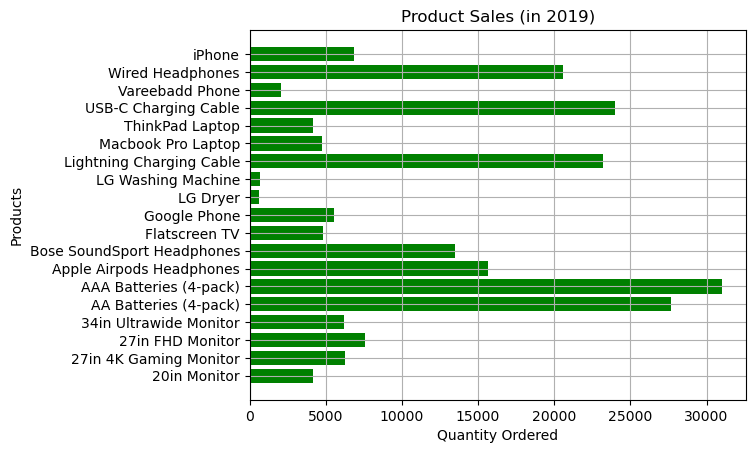

In [22]:
product = result3.index.values

plt.barh(product , result3['Quantity Ordered'] , color='green')
plt.title("Product Sales (in 2019)")
plt.ylabel('Products')
plt.xlabel('Quantity Ordered')
plt.grid()
plt.xticks
plt.show()

C:\Users\Shivam\AppData\Local\Temp\ipykernel_15560\1212499444.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product , rotation='vertical')


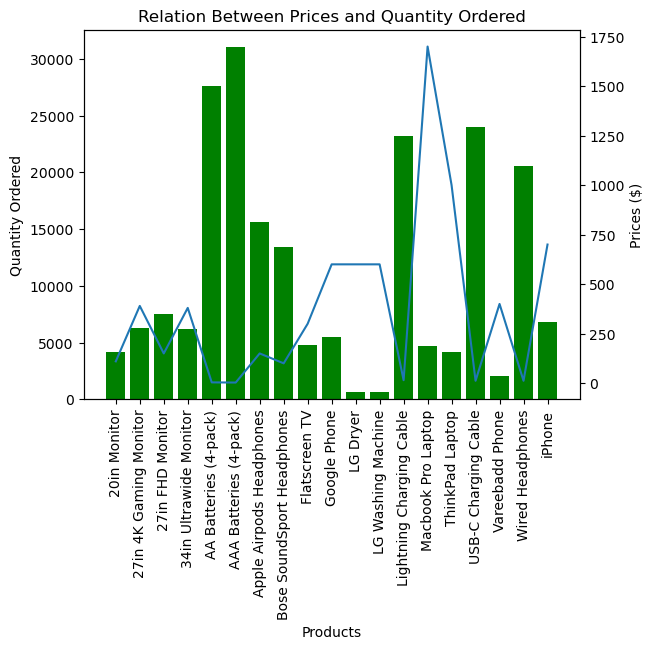

In [24]:
prices = sales_data.groupby('Product').mean()['Price Each']

fig , ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product , result3['Quantity Ordered'] , color='green')
ax2.plot(product , prices)
ax1.set_xlabel('Products')
ax1.set_title('Relation Between Prices and Quantity Ordered')
ax1.set_xticklabels(product , rotation='vertical')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Prices ($)')
plt.show()

### Question 5: What products are most often sold together? 


Answer : ('iPhone', 'Lightning Charging Cable') : 1005

In [26]:
df = sales_data[sales_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [27]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
for key , value in count.most_common(5):
    print(str(key) + " : " + str(value))

('iPhone', 'Lightning Charging Cable') : 1005
('Google Phone', 'USB-C Charging Cable') : 987
('iPhone', 'Wired Headphones') : 447
('Google Phone', 'Wired Headphones') : 414
('Vareebadd Phone', 'USB-C Charging Cable') : 361


# <h1><center> ❤️Thank You❤️ </center></h1>